### Project: Face Detection:
The objective of this project is to implemenent and demonstrate the Haar Cascades face detector, as implemented in OpenCV - Python: 
 * We shall illustrate its performance on individual images as well as live video stream.

#### Author: Mohsen Ghazel (mghazel)
* Date: April 15th, 2021

### Step 1: Imports and global variables

#### 1.1) Python import:

In [1]:
#------------------------------------------------------
# Python imports and environment setup
#------------------------------------------------------
# opencv
import cv2
# numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# input/output OS
import os 

# date-time to show date and time
import datetime

# to display the figures in the notebook
%matplotlib inline

#------------------------------------------
# Test imports and display package versions
#------------------------------------------
# Testing the OpenCV version
print("OpenCV : ",cv2.__version__)
# Testing the numpy version
print("Numpy : ",np.__version__)

OpenCV :  3.4.8
Numpy :  1.19.2


### Step 2: Input data
* Setup the input data and configuration files paths.

#### 2.1) Setup the folder containing the input images:

In [2]:
#----------------------------------------------------
# Setup the folder comtaining the test images:
#----------------------------------------------------
test_images_folder = "../data/test-images/"


#### 2.2) Setup the folder containing the Haar Cascades configuration files:
* OpenCV comes with a pre-trained Haar Cascades with configuration xml files.


In [3]:
#----------------------------------------------------
# Setup the folder comtaining the pre-trained Haar 
# Cascades detector configuration XML files:
#----------------------------------------------------
haar_cascades_configs_folder = "C:/MyWebSites/MyWebsSite/MyProjects/Human-Face/resources/DATA/haarcascades/"

#### 2.3) Setup the configuration file for the Haar Cascades face detector:
* This is the configuration file used by the pre-trained Haar Cascades face detector:

In [4]:
face_cascade = cv2.CascadeClassifier(haar_cascades_configs_folder + 'haarcascade_frontalface_default.xml')

#### 2.4) Setup the configuration file for the Haar Cascades eye detector:
* This is the configuration file used by the pre-trained Haar Cascades eye detector:

In [5]:
eye_cascade = cv2.CascadeClassifier(haar_cascades_configs_folder + 'haarcascade_eye.xml')

### Step 3: Detect faces and eyes from images:
* We are now ready to run the Haar Cascades to detect human faces and eyes from images

#### 3.1) Define the Haar Cascades face detector utility function:

In [6]:
"""Use Haar Cascades factor detector to detect faces:
    # Argument:
        img: input image
    # Returns:
        None.
"""
def detect_face(img):
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        # cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (0,255,0), 3) 
        
    return face_img


#### 3.2) Define the Haar Cascades eyes detector utility function:

In [7]:
"""Use Haar Cascades factor detector to detect eyes:
    # Argument:
        img: input image
    # Returns:
        None.
"""
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img) 
    
    
    for (x,y,w,h) in eyes: 
        # cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,0,0), 3)
        
    return face_img

#### 3.3) Process the test images to detect faces and eyes:

Processing image: ../data/test-images/0_Parade_marchingband_1_89.jpg
Processing image: ../data/test-images/12_Group_Group_12_Group_Group_12_27.jpg
Processing image: ../data/test-images/12_Group_Group_12_Group_Group_12_3.jpg
Processing image: ../data/test-images/12_Group_Group_12_Group_Group_12_45.jpg
Processing image: ../data/test-images/12_Group_Group_12_Group_Group_12_8.jpg
Processing image: ../data/test-images/13_Interview_Interview_2_People_Visible_13_41.jpg
Processing image: ../data/test-images/13_Interview_Interview_2_People_Visible_13_45.jpg
Processing image: ../data/test-images/17_Ceremony_Ceremony_17_60.jpg
Processing image: ../data/test-images/17_Ceremony_Ceremony_17_75.jpg
Processing image: ../data/test-images/23_Shoppers_Shoppers_23_38.jpg


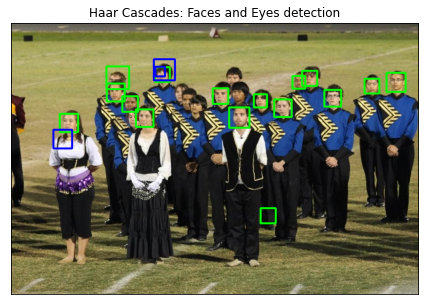

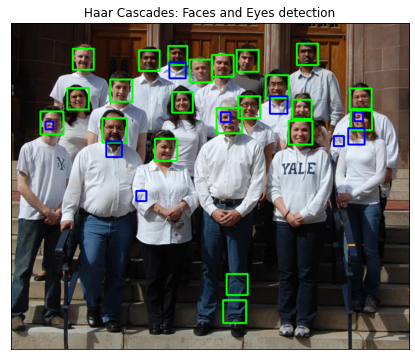

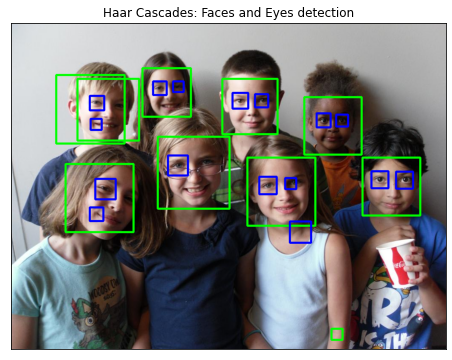

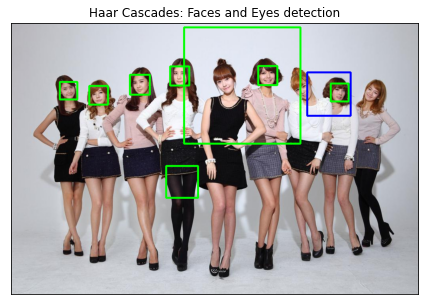

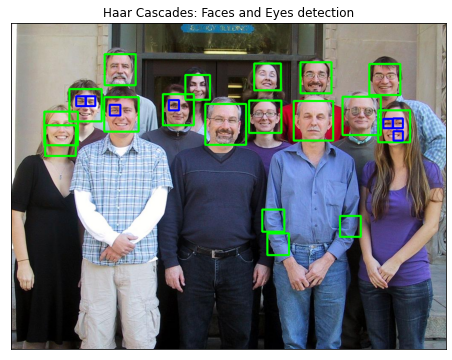

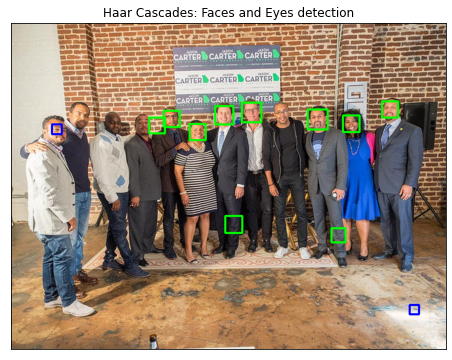

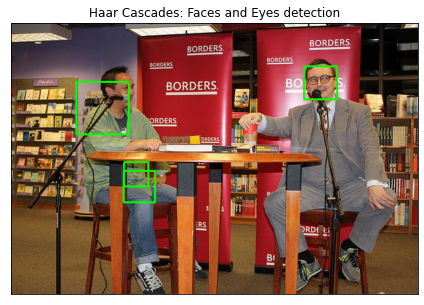

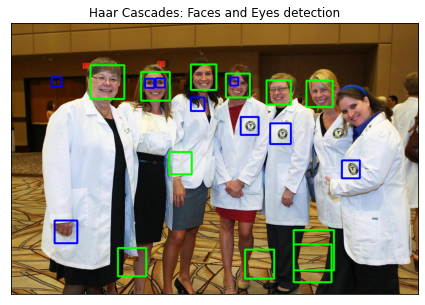

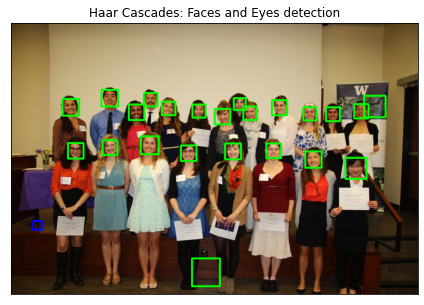

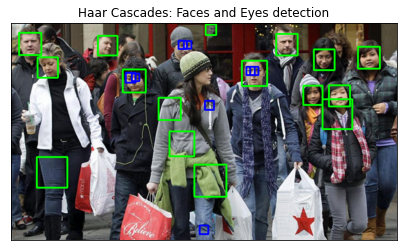

In [36]:
#------------------------------------------------------
# 3.3.1) Itetate over all the images in the test images 
#      folder:
#------------------------------------------------------
for filename in os.listdir(test_images_folder):
    #------------------------------------------------------
    # 3.3.2) read the test image
    #------------------------------------------------------
    print('Processing image: ' + os.path.join(test_images_folder,filename))
    img = cv2.imread(os.path.join(test_images_folder,filename))
    # process the valid images
    if img is not None:
        #------------------------------------------------------
        # 3.3.3) deploy the Haar Cascades to detect faces
        #------------------------------------------------------
        faces = detect_face(img)
        #------------------------------------------------------
        # 3.3.4) deploy the Haar Cascades to detect eyes
        #------------------------------------------------------
        faces_eyes = detect_eyes(faces)
        # create a figure
        plt.figure(figsize=(8, np.uint8(8 * img.shape[0]/img.shape[1])))
        # visualize detection results
        plt.subplot(111)
        plt.title("Haar Cascades: Faces and Eyes detection", fontsize=12)
        plt.xticks([]), plt.yticks([])
        plt.imshow(cv2.cvtColor(faces_eyes, cv2.COLOR_BGR2RGB))

### Step 4: Face and eyes detection from video:
* We can also run the Haar Cascades to detect human faces and eyes from video frames:
  * This is done independently for each frame in a straightforward way as follows:
    * grab each video frame and treat it as an image
    * run the Haar Cascades to detect human faces and eyes from the frame, as done above.
  * This can be done for live video or from a video file
  * Next, we illustrate face and eyes detection from live video

In [8]:
#------------------------------------------------------
# 4.1) Detect faces and eyes detection from live video
#------------------------------------------------------
# start the camera capture
cap = cv2.VideoCapture(0) 

# iterate over the camera captured frames
while True: 
    #------------------------------------------------------
    # Step 1: grab the next frame
    #------------------------------------------------------
    ret, frame = cap.read(0) 
    #------------------------------------------------------
    # Step 2: deploy the Haar Cascades to detect faces
    #------------------------------------------------------
    frame = detect_face(frame)
    #------------------------------------------------------
    # Step 3: deploy the Haar Cascades to detect eyes
    #------------------------------------------------------
    frame = detect_eyes(frame)
    #------------------------------------------------------
    # Step 4: display the frame with overlaid face and eyes 
    #         detections.
    #------------------------------------------------------
    cv2.imshow('Video Face & Eyes Detection', frame) 
    
    #------------------------------------------------------
    # Quit if user presses: ESC key
    #------------------------------------------------------
    c = cv2.waitKey(1) 
    if c == 27: 
        break 

#------------------------------------------------------
# Close the camera feed 
#------------------------------------------------------
cap.release() 
# close all windows.
cv2.destroyAllWindows()

### Step 5: Display a successful execution message

In [34]:
# display a final message
# current time
now = datetime.datetime.now()
# display a message
print('Program executed successfully on: '+ str(now.strftime("%Y-%m-%d %H:%M:%S") + "...Goodbye!\n"))

Program executed successfully on: 2021-04-15 10:36:19...Goodbye!

